In [23]:
import pandas as pd
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('.'), "../preprocessing"))

In [3]:
from transform_for_num_issues_pred import main as transform_dataset

In [4]:
df_orig = pd.read_pickle('../data/data_from_remove_from_dataset.pkl')
df_orig.shape

(516406, 40)

In [6]:
df = df_orig[['TYPE', 'OPEN_DT']]

In [11]:
df['year'] = df.OPEN_DT.map(lambda x: x.year)
df.drop('OPEN_DT', axis=1, inplace=True)
df['num_issues'] = 1

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
df.head(1).T

,905425
TYPE,Request for Snow Plowing
year,2017
num_issues,1


### Count of ea TYPE by year

In [30]:
df3 = df.groupby(['TYPE', 'year']).count().reset_index().pivot(index='TYPE', columns='year', values='num_issues') \
    .drop(2017, axis=1)
df3

year,2011,2012,2013,2014,2015,2016
TYPE,,,,,,
ADA,NaN,NaN,NaN,1.0,NaN,NaN
Abandoned Bicycle,36.0,98.0,145.0,169.0,321.0,362.0
Abandoned Building,57.0,92.0,76.0,109.0,97.0,50.0
Abandoned Vehicles,479.0,958.0,1268.0,1424.0,1916.0,2360.0
Alert Boston,3.0,NaN,1.0,1.0,NaN,10.0
Animal Found,NaN,NaN,NaN,7.0,19.0,85.0
Animal Generic Request,NaN,NaN,1.0,13.0,116.0,893.0
Animal Lost,NaN,NaN,1.0,7.0,15.0,63.0
Animal Noise Disturbances,NaN,NaN,NaN,NaN,2.0,49.0


### Count of ea type

In [18]:
df.TYPE.head().count()

5

In [19]:
df1 = df[['TYPE', 'num_issues']]

In [26]:
df2 = df1.groupby(['TYPE']).count().reset_index().sort_values('num_issues', ascending=False)
df2

,TYPE,num_issues
143,Schedule a Bulk Item Pickup,65443
133,Request for Snow Plowing,49984
78,Missed Trash/Recycling/Yard Waste/Bulk Item,40942
106,Parking Enforcement,27496
159,Street Light Outages,22191
144,Schedule a Bulk Item Pickup SS,21059
135,Requests for Street Cleaning,20368
49,Graffiti Removal,16674
132,Request for Recycling Cart,13471
131,Request for Pothole Repair,12985


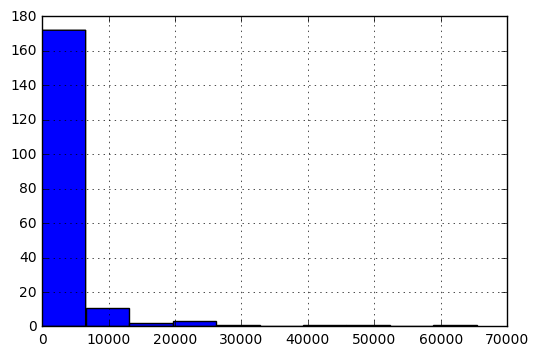

In [27]:
df2.num_issues.hist();

In [28]:
df2.num_issues.describe()

count      192.000000
mean      2689.614583
std       7603.573198
min          1.000000
25%         47.750000
50%        335.500000
75%       1649.250000
max      65443.000000
Name: num_issues, dtype: float64

In [32]:
df2[df2.num_issues < df2.num_issues.quantile(0.25)].TYPE

87                         No Price on Gas/Wrong Price
126                                           Rat Bite
67                                  Item Price Missing
161                               Student Overcrowding
142                                Scanning Overcharge
14                        Big Buildings Online Request
24                                             Checkin
81                    Municipal Parking Lot Complaints
182                             Valet Parking Problems
120                                   Poor Ventilation
98                                       OCR Metrolist
90           No Utilities - Food Establishment - Sewer
91           No Utilities - Food Establishment - Water
171                         Unit Pricing Wrong/Missing
154                                   Snow/Ice Control
39                             Fire Department Request
71                           Loud Parties/Music/People
89           No Utilities - Food Establishment - Flood
152       

In [39]:
df4 = df3.reset_index()

In [46]:
df2.num_issues.quantile(0.35)

108.54999999999998

In [47]:
df2[df2.num_issues < df2.num_issues.quantile(0.35)].TYPE.tolist()

['Fire in Food Establishment',
 'BWSC Pothole',
 'Animal Lost',
 'Carbon Monoxide',
 'City/State Snow Issues',
 'Bicycle Issues',
 'Illegal Use',
 'No Utilities Residential - Gas',
 'Cemetery Maintenance Request',
 'Snow Removal',
 'Mosquitoes (West Nile)',
 'Roadway Flooding',
 'Illegal Vending',
 'Occupying W/Out A Valid CO/CI',
 'Bridge Maintenance',
 'Billing Complaint',
 'Phone Bank Service Inquiry',
 'Animal Noise Disturbances',
 'Planting',
 'No Price on Gas/Wrong Price',
 'Rat Bite',
 'Item Price Missing',
 'Student Overcrowding',
 'Scanning Overcharge',
 'Big Buildings Online Request',
 'Checkin',
 'Municipal Parking Lot Complaints',
 'Valet Parking Problems',
 'Poor Ventilation',
 'OCR Metrolist',
 'No Utilities - Food Establishment - Sewer',
 'No Utilities - Food Establishment - Water',
 'Unit Pricing Wrong/Missing',
 'Snow/Ice Control',
 'Fire Department Request',
 'Loud Parties/Music/People',
 'No Utilities - Food Establishment - Flood',
 'Sign Shop WO',
 'Walk-In Service 

In [43]:
df4[df4.TYPE.isin(df2[df2.num_issues < df2.num_issues.quantile(0.35)].TYPE)]

year,TYPE,2011,2012,2013,2014,2015,2016
0,ADA,NaN,NaN,NaN,1.0,NaN,NaN
4,Alert Boston,3.0,NaN,1.0,1.0,NaN,10.0
7,Animal Lost,NaN,NaN,1.0,7.0,15.0,63.0
8,Animal Noise Disturbances,NaN,NaN,NaN,NaN,2.0,49.0
9,Automotive Noise Disturbance,NaN,NaN,NaN,NaN,NaN,3.0
11,BWSC Pothole,NaN,18.0,9.0,22.0,24.0,12.0
13,Bicycle Issues,NaN,NaN,NaN,NaN,57.0,20.0
14,Big Buildings Online Request,NaN,5.0,11.0,15.0,3.0,2.0
15,Billing Complaint,NaN,12.0,11.0,11.0,13.0,5.0
17,Bridge Maintenance,5.0,14.0,19.0,7.0,5.0,2.0


In [36]:
df3.head()..loc[~df2[df2.num_issues < df2.num_issues.quantile(0.25)].TYPE]

TypeError: bad operand type for unary ~: 'str'